<a href="https://colab.research.google.com/github/Fcazarez/RRC3_UML_TopicModelling/blob/main/G7%20UML%2020K%20News%20Topic%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 7: Project: Topic Modeling - Topic Classification
## COMP-3705-Unsupervised Machine Learning
## Group Members: Felix, Franciso, Elizer, Jagnoor, and Hamed


## *About the Dataset:*
## The 20 Newsgroups dataset is a collection of approximately 20,000 newsgroup documents, partitioned nearly evenly across 20 different newsgroups. [Link SciKitlearn](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)



# *Objective:*
## The objective is to uncover hidden topics within the dataset, helping in understanding the topics being discussed.

# *Summary:*

## To process the 20 Newsgroups dataset for topic modeling, start by loading the dataset using the `fetch_20newsgroups` function from scikit-learn.

## Clean the data by removing emojies, emails, punctuation, either manually or using automated methods. Preprocess the text by tokenizing it, removing stopwords, and lemmatizing words, using libraries like NLTK or spaCy.

## The cleanning process was controled by a quick view function which allows to take a rapid view of the text. For vectorization a convenient number of words and features were set up.

## Create Bigram and Trigram models to capture the context of words in your documents. Build the topic model using an algorithm like Latent Dirichlet Allocation (LDA) to extract topics from your documents, using the Gensim package.

## Finally, evaluate your model using measures like perplexity and coherence score. The objective of this process is to uncover the hidden topics within the 20 Newsgroups dataset, which can help in understanding what topics people are discussing in these newsgroups.

## The success criteria for topic modeling consider Understandability, Coherence, and Purposefulness. In this context, the topic modeling is successful since the results are understandable, the topics are coherent, and the classification can be used for further purposes. This means that the model’s output is easy to interpret, the topics are logically consistent, and the results can be applied to meet the objectives of the project


In [ ]:

# `pyLDAvis` is a Python library designed to help interpret the topics in a topic model that has been fit to a corpus of text data.
!pip install pyLDAvis==2.1.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *Importing the libraries*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename)

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, stem_text

from sklearn.feature_extraction.text import TfidfVectorizer

#import langdetect  # language detection
import matplotlib.pyplot  # plotting
import nltk  # natural language processing
import numpy  # arrays and matrices
import pandas  # dataframes
import pyLDAvis  # plotting
import pyLDAvis.sklearn  # plotting
import regex  # regular expressions
import sklearn  # machine learning


# define consolidated data cleaning function

#from sklearn.datasets import fetch_20newsgroups
import string
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# Import necessary libraries and modules
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import requests
import tarfile

# Import necessary libraries and modules
import requests
import tarfile
# Import necessary libraries and modules
import os
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# installing specific word dictionarys
# used for stopword removal and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
## common functions

# This function, perplexity_by_ntopic, is designed to calculate the perplexity score for different numbers of topics in a Latent Dirichlet Allocation (LDA) model
# Define a function named perplexity_by_ntopic that takes 'data' and 'ntopics' as input parameters
def perplexity_by_ntopic(data, ntopics):
    # Create an empty dictionary to store the output with keys "Number Of Topics" and "Perplexity Score"
    output_dict = {"Number Of Topics": [], "Perplexity Score": []}

    # Iterate over each value in 'ntopics'
    for t in ntopics:
        # Create an instance of LatentDirichletAllocation with 't' components and specified settings
        lda = sklearn.decomposition.LatentDirichletAllocation(n_components=t, learning_method="online", random_state=0)

        # Fit the LDA model to the input 'data'
        lda.fit(data)

        # Append the current 't' and the perplexity score of the model to the output dictionary
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))

        # Create a DataFrame from the output dictionary
        output_df = pandas.DataFrame(output_dict)

        # Find the index of the row with the minimum perplexity score
        index_min_perplexity = output_df["Perplexity Score"].idxmin()

        # Retrieve the 'Number Of Topics' value corresponding to the minimum perplexity
        output_num_topics = output_df.loc[index_min_perplexity, "Number Of Topics"]

    # Return a tuple containing the output DataFrame and the number of topics with minimum perplexity
    return (output_df, output_num_topics)


# Define a function named get_topics that takes 'mod', 'vec', 'names', 'docs', 'ndocs', and 'nwords' as input parameters
def get_topics(mod, vec, names, docs, ndocs, nwords):
    # Extract the word to topic matrix from the LDA model
    W = mod.components_

    # Normalize the word to topic matrix
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]

    # Extract the topic to document matrix from the LDA model
    H = mod.transform(vec)

    # Create dictionaries to store word-topic and document-topic relationships
    W_dict = {}  # word topic table
    H_dict = {}  # document topic table

    # Iterate over each topic in the word to topic matrix
    for tpc_idx, tpc_val in enumerate(W_norm):
        # Create a topic label
        topic = "Topic{}".format(tpc_idx)

        # Extract indices of the top 'nwords' words for the current topic
        W_indices = tpc_val.argsort()[::-1][:nwords]

        # Create a list of tuples containing word probabilities and corresponding names
        W_names_values = [
            (round(tpc_val[j], 4), names[j])
            for j in W_indices
        ]
        # Add the word-topic information to the dictionary
        W_dict[topic] = W_names_values

        # Extract indices of the top 'ndocs' documents for the current topic
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]

        # Create a list of tuples containing document probabilities and corresponding names
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j])
            for j in H_indices
        ]
        # Add the document-topic information to the dictionary
        H_dict[topic] = H_names_values

    # Create DataFrames from the word-topic and document-topic dictionaries
    W_df = pandas.DataFrame(
        W_dict,
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )

    # Return a tuple containing the word-topic DataFrame and the document-topic DataFrame
    return (W_df, H_df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
   # cleaning functions
   #These functions collectively aim to clean and preprocess text data by removing emojis, emails,
   #specific punctuation, and stopwords, as well as performing lemmatization. The additional stopwords and email pattern are tailored
# some good ideas obtained from: https://python.plainenglish.io/text-data-cleaning-in-python-324d597f7b95

# Define a set of additional stopwords
extra_stopwords_black = {'n/a', 'unspecified', "subject", "build", "nntp-posting-host", "go", "to", "from", "reply-to", "ax", "ca", "ve", "etc"}

# Combine NLTK and string stopwords, and add extra stopwords
stopwords_set = set(stopwords.words('english') + list(string.punctuation))
stopwords_set.update(extra_stopwords_black)

# Define a regex pattern for detecting email addresses
# This regex pattern is quite complex because it tries to account for the many variations and complexities of valid email address formats.
email_pattern = "(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|\"(?:[\\x01-\\x08\\x0b\\x0c\\x0e-\\x1f\\x21\\x23-\\x5b\\x5d-\\x7f]|\\\\[\\x01-\\x09\\x0b\\x0c\\x0e-\\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\\x01-\\x08\\x0b\\x0c\\x0e-\\x1f\\x21-\\x5a\\x53-\\x7f]|\\\\[\\x01-\\x09\\x0b\\x0c\\x0e-\\x7f])+)\\])"

# Define a function to remove emojis from a string
def remove_emoji(string):
    emoji_pattern = re.compile("["
                              u"U0001F600-U0001F64F"  # emoticons
                              u"U0001F300-U0001F5FF"  # symbols & pictographs
                              u"U0001F680-U0001F6FF"  # transport & map symbols
                              u"U0001F1E0-U0001F1FF"  # flags (iOS)
                              u"U00002702-U000027B0"  # various symbol characters
                              u"U000024C2-U0001F251"  # includes variety symbols pictographs, including enclosed alphanumeric symbols, enclosed ideographic symbols, and others
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Define a function to remove email addresses from a string
def remove_emails(text):
    return re.sub(email_pattern, '', text)

# Define a function to remove specific punctuation and stopwords from a string
def remove_punctuation_(text):
    # Remove only punctuation that separates sentences
    sentence = text.replace("/", ' ').replace(',', ' ').replace('?', ' ').replace('!', ' ').replace(':', ' ').strip()

    # Separate sentence into tokens except for empty spaces
    tokens = [i for i in re.split('\s|\n|\t', sentence.strip()) if i != '']

    # Remove tokens that don't contain any alphanumeric characters.
    # list of tokens from the tokens list where each token contains at least one alphanumeric character
    tokens = list(filter(lambda s: any([c.isalnum() for c in s]), tokens))

    # Clean out leading and trailing punctuation
    tokens = [i.rstrip('.').rstrip(',').lstrip('(').rstrip(')').lstrip('<').rstrip('>').rstrip(':').lstrip('>').rstrip('>').lstrip('"').rstrip('"').lstrip("'").rstrip("'").lstrip("-").rstrip("-") for i in tokens]

    # Merge tokens, excluding those in the stopwords set
    merged_tokens = ' '.join([i for i in tokens ])
    return merged_tokens

# Define a function to perform lemmatization and remove stopwords
def lemmatize_(text):
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_set]

    # Join the lemmatized tokens into a string
    return ' '.join(lemmatized_tokens)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:39: DeprecationWarning: invalid escape sequence '\s'
<>:39: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-59-cc79cabe7141>:39: DeprecationWarning: invalid escape sequence '\s'
  tokens = [i for i in re.split('\s|\n|\t', sentence.strip()) if i != '']


In [ ]:


# URL to the dataset
url = "https://raw.githubusercontent.com/ElizerLising/UML/main/20news-bydate.tar.gz"

# sends a GET request to the URL and stores the response in a variable
response = requests.get(url)

# Save the downloaded content to a local file named "20news-19997.tar.gz"
# opens a file in write-binary mode ("wb"), and writes the content of the response to it
with open("20news-19997.tar.gz", "wb") as f:
    f.write(response.content)

# Extract the dataset from the compressed tar.gz file
with tarfile.open("20news-19997.tar.gz", "r:gz") as tar:
    # Extract all files and directories from the tar.gz file. The extracted files are saved in the current working directory
    tar.extractall()


#newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# reading text data from a directory where each subdirectory represents a category and contains documents related to that category
# the result of this script is a DataFrame where each row corresponds to a document, with the document’s text in the ‘text’ column and its category in the ‘target’ column
# Initialize lists to store document text and target labels
data = []
target = []

# Directory where the dataset is extracted, we work on the train folder of data
dataset_dir = "20news-bydate-train"

# Iterate over categories in the dataset directory
for category in os.listdir(dataset_dir):
    # Construct the full path to the category
    category_path = os.path.join(dataset_dir, category)

    # Check if the path corresponds to a directory
    if os.path.isdir(category_path):
        # Iterate over documents in the category
        for document in os.listdir(category_path):
            # Construct the full path to the document
            document_path = os.path.join(category_path, document)

            # Open the document file and read its content, ignoring encoding errors
            with open(document_path, "r", errors="ignore") as f:
                # Append the document content to the 'data' list
                data.append(f.read())

            # Append the category (target label) to the 'target' list
            target.append(category)

# Create a Pandas DataFrame with 'text' and 'target' columns
df = pd.DataFrame({'text': data, 'target': target})

# Display the DataFrame
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,target
0,From: crh@regent.e-technik.tu-muenchen.dbp.de ...,rec.autos
1,From: matmcinn@nuscc.nus.sg (Matthew MacIntyre...,rec.autos
2,From: edwards@world.std.com (Jonathan Edwards)...,rec.autos
3,From: welty@cabot.balltown.cma.COM (richard we...,rec.autos
4,From: khalsa@spartanSanDiego.NCR.com (G.K. Kha...,rec.autos
...,...,...
11309,From: ipser@solomon.technet.sg (Ed Ipser)\nSub...,talk.politics.misc
11310,Subject: Re: Top Ten Comments Overheard in the...,talk.politics.misc
11311,From: s0xjg@exnet.co.uk (Xavier Gallagher)\nSu...,talk.politics.misc
11312,From: muellerm@vuse.vanderbilt.edu (Marc Muell...,talk.politics.misc


In [ ]:
 #retrieves the content of the first document in the DataFrame df from the folder: 20news-bydate-train
 df["text"][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"From: crh@regent.e-technik.tu-muenchen.dbp.de (Christian Huebner)\nSubject: Re: Manual Shift Bigots\nOrganization: Technical University of Munich, Germany\nLines: 33\n\nIn rec.autos you write:\n\n>if ayrton senna can drive a racecar with fully automatic transmission,\n>it can't be half bad..  :-)\n\nThis McLaren auto-transmission (I still think it's only half auto,\nbut You may be right) has NOTHING to do with Your GM, Chrysler, Volvo,\nor whatever auto transmission. It's a normal manual transmission\ngearbox with clutch and all, but there are servo motors, which do\nthe shifting. \n\nThat means, there is no power loss in the drivetrain (if You take out \nminimal mechanical friction), and the sami-auto transmissions \n(Ferrari, Williams, McLaren(?),...) don't tell You, when to shift,\neither. However, these transmissions share an important disadvantage\nwith Your stock auto-trannie: They are EXPENSIVE.\n\nAs long as these servo-shifted gearboxes aren't available on \n'normal' cars I'm

In [ ]:

 #retrieves the content of the second document in the DataFrame df from the folder: 20news-bydate-train
df['text'][1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'From: matmcinn@nuscc.nus.sg (Matthew MacIntyre at the National University of Senegal)\nSubject: Re: WARNING.....(please read)...\nOrganization: National University of Singapore\nX-Newsreader: Tin 1.1 PL4\nLines: 12\n\nmchaffee@dcl-nxt07 (Michael T Chaffee) writes:\n: significantly less than the value of many automobiles.  And for those who will\n: argue that the animals out there stealing cars and everything else (not to\n: mention committing COMPLETELY senseless acts of violence, such as rape) cannot\n: be valued in terms of money because they are human beings, I submit that they\n: are not human beings.  Jim Callison, I think, is on the right track.  And \n\nAbsolutely. A scratch on my car bothers me more than the death of any\nnumber of scum. All of you feel the same way---you just won\'t admit it.\nWhen are people going to realise that the mere fact that a piece of flesh\nmoves and has the approximate shape of a human being does not in itself\nmean that it has "rights"?\n'

In [ ]:
# define a function to print a quick overview of a Pandas DataFrame, including its shape, column names, and the first few rows
def dataframe_quick_look(df, nrows):
    # Print the shape of the DataFrame
    print("SHAPE:\n{shape}\n".format(shape=df.shape))           # .format(shape=df.shape) replaces the {shape} placeholder in the string with the value of df.shape

    # Print the column names of the DataFrame
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))

    # Print the first few rows (specified by 'nrows') of the DataFrame
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataframe_quick_look(df, nrows=2)

SHAPE:
(11314, 2)

COLUMN NAMES:
Index(['text', 'target'], dtype='object')

HEAD:
                                                text     target
0  From: crh@regent.e-technik.tu-muenchen.dbp.de ...  rec.autos
1  From: matmcinn@nuscc.nus.sg (Matthew MacIntyre...  rec.autos



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# *Complete Data Cleaning*

In [ ]:
# all the cleaning steps

# Clean the tex by appying the avobe defined functions
# Convert all documents to lowercase
newsgroups_data_lowercase = [doc.lower() for doc in df["text"]]

# Remove email addresses from each document
no_email = [remove_emails(doc) for doc in newsgroups_data_lowercase]

# Remove emojis from each document
no_emoji = [remove_emoji(doc) for doc in no_email]

# Remove punctuation and stopwords, and perform lemmatization on each document
newsgroups_pre_cleaned = [remove_punctuation_(doc) for doc in no_emoji]

# Lemmatize each document
cleaned_data = [lemmatize_(doc) for doc in newsgroups_pre_cleaned]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Original Document:\n", df["text"][1])
print("\nDocument after converting to lowercase:\n", newsgroups_data_lowercase[1])
print("\nDocument after removing email:\n", no_email[1])
print("\nDocument after removing punctuation:\n", newsgroups_pre_cleaned[1])
print("\nDocument after removing stopwords:\n", cleaned_data[1])

Original Document:
 From: matmcinn@nuscc.nus.sg (Matthew MacIntyre at the National University of Senegal)
Subject: Re: WARNING.....(please read)...
Organization: National University of Singapore
X-Newsreader: Tin 1.1 PL4
Lines: 12

mchaffee@dcl-nxt07 (Michael T Chaffee) writes:
: significantly less than the value of many automobiles.  And for those who will
: argue that the animals out there stealing cars and everything else (not to
: mention committing COMPLETELY senseless acts of violence, such as rape) cannot
: be valued in terms of money because they are human beings, I submit that they
: are not human beings.  Jim Callison, I think, is on the right track.  And 

Absolutely. A scratch on my car bothers me more than the death of any
number of scum. All of you feel the same way---you just won't admit it.
When are people going to realise that the mere fact that a piece of flesh
moves and has the approximate shape of a human being does not in itself
mean that it has "rights"?


Documen

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Models:
## *Develop code to first vectorize your data, and then to train at least six LDA and NMF topic models on these vectors.*
## *Make clear section headings for each type of model, record each set of hyperparameters (for both vectorization and the topic models) you try, and find the perplexity, word-topic table and document-topic table for each; present this information neatly and use it to choose your best LDA and NMF models.*

In [ ]:
# Set the maximum number of words to keep in the feature space
number_words = 20

# Get the number of documents in the DataFrame
number_docs = len(df['text'])

# Set the number of features (words) to keep in the vectorization
number_features = 100

# Initialize a CountVectorizer with specified parameters
vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(analyzer="word", max_df=0.5, min_df=20, max_features=number_features)

# Fit and transform the cleaned data using the CountVectorizer
clean_vec1 = vectorizer1.fit_transform(cleaned_data)

# Print the vectorized representation of the first document
print(clean_vec1[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  (0, 84)	1
  (0, 16)	2
  (0, 75)	1
  (0, 81)	1
  (0, 46)	1
  (0, 66)	1
  (0, 47)	1
  (0, 78)	1
  (0, 9)	1
  (0, 70)	1
  (0, 43)	1
  (0, 83)	1
  (0, 59)	2
  (0, 51)	1


# 1. LDA

# *Perplexity*

In [ ]:
# Perplexity, abbreviated to PP, measures the number of different equally most probable words that can follow
# any given word on average. Let's consider two words as an example: the and announce. The word the can
# preface an enormous number of equally most probable words, while the number of equally most probable
# words that can follow the word announce is significantly less—albeit still a large number.

# Calculate perplexity scores for different numbers of topics and find the optimal number of topics
df_perplexity, optimal_num_topics = perplexity_by_ntopic(clean_vec1, ntopics=[6, 7, 8, 9, 10, 11, 12])

# Print the optimal number of topics
print(optimal_num_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Number Of Topics'>

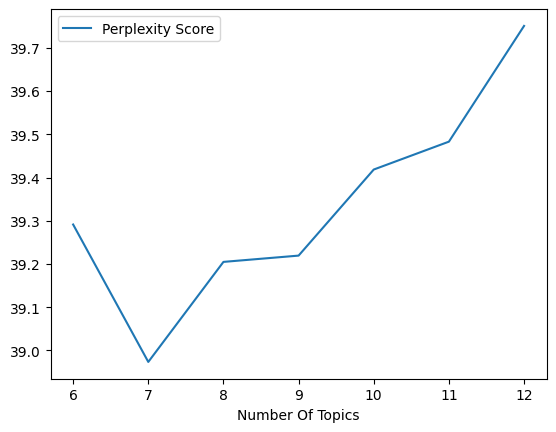

In [ ]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

# Word-topic table

In [ ]:
# Create an instance of LatentDirichletAllocation with the optimal number of topics
lda = sklearn.decomposition.LatentDirichletAllocation(n_components=optimal_num_topics, learning_method="online", random_state=0)

# Fit the LDA model to the vectorized data
lda.fit(clean_vec1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [ ]:
# using a trained Latent Dirichlet Allocation (LDA) model to extract topics from a collection of preprocessed documents
raw = cleaned_data

#gets the feature names (i.e., the words in the vocabulary) from the vectorizer vectorizer1 and stores them in feature_names_vec1
feature_names_vec1 = vectorizer1.get_feature_names_out()

# Get word and document topics using the trained LDA model
W_df, H_df = get_topics(mod=lda, vec=clean_vec1, names=feature_names_vec1, docs=raw, ndocs=number_docs, nwords=number_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# train multiple Latent Dirichlet Allocation (LDA) models with different numbers of topics and calculate the perplexity score for each model
def perplexity_by_ntopic_and_models(data, ntopics):
    # Initialize an output dictionary to store results
    output_dict = {"Number Of Topics": [], "Perplexity Score": [], "Models": []}

    # Iterate over the specified numbers of topics
    for t in ntopics:
        # Create an LDA model with the current number of topics
        lda = sklearn.decomposition.LatentDirichletAllocation(n_components=t, learning_method="online", random_state=0)

        # Fit the LDA model to the data
        lda.fit(data)

        # Append information to the output dictionary
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        output_dict["Models"].append(lda)

    # Return the output dictionary
    return output_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The perplexity score is a measure of how well a probability model predicts a sample, and is commonly used to compare different topic models. A lower perplexity score indicates better generalization performance. So, this function can be used to determine the optimal number of topics for the LDA model.

## Word-Topic perplexity Table

In [ ]:
#  uses the previously defined functions and information to iterate over a list of LDA models, extract word-topic relationships, and print the word-topic table along with the perplexity score for each model
lda_models_info = perplexity_by_ntopic_and_models(clean_vec1, [6, 7, 8, 9, 10, 11, 12])

# Iterate over the list of LDA models and their information
for index, lda_model in enumerate(lda_models_info["Models"]):
    # Get word-topic relationships using the current LDA model
    W_df, _ = get_topics(mod=lda_model, vec=clean_vec1, names=feature_names_vec1, docs=raw, ndocs=number_docs, nwords=number_words)

    # Print the word-topic table and perplexity for the current model
    print(f"Word-Topic Table for Model with {lda_models_info['Number Of Topics'][index]} Topics:")
    print(W_df)
    print(f"Perplexity Score: {lda_models_info['Perplexity Score'][index]}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word-Topic Table for Model with 6 Topics:
                       Topic0             Topic1             Topic2  \
Word0        (0.0604, system)     (0.0806, year)    (0.0522, would)   
Word1           (0.0484, use)     (0.0499, game)   (0.0439, people)   
Word2           (0.0426, key)     (0.0456, time)      (0.0433, one)   
Word3        (0.0404, window)      (0.0365, one)    (0.0301, think)   
Word4         (0.0394, drive)       (0.036, new)  (0.0278, article)   
Word5       (0.0365, program)     (0.0359, last)     (0.0257, like)   
Word6       (0.0316, problem)    (0.0348, first)     (0.0251, know)   
Word7           (0.0282, bit)  (0.0345, article)      (0.0248, say)   
Word8          (0.0257, work)      (0.0302, day)    (0.0202, thing)   
Word9          (0.0256, need)      (0.0299, get)      (0.02, right)   
Word10          (0.0251, get)      (0.0275, two)     (0.0199, make)   
Word11        (0.0247, using)     (0.0241, good)     (0.0177, even)   
Word12        (0.0241, space)     (

# Document-topic perplexity table

In [ ]:
for index, lda_model in enumerate(lda_models_info["Models"]):
    _, H_df = get_topics(mod=lda_model, vec=clean_vec1, names=feature_names_vec1, docs=raw, ndocs=number_docs, nwords=number_words)

    # Print the document-topic table and perplexity for the current model
    print(f"Document-Topic Table for Model with {lda_models_info['Number Of Topics'][index]} Topics:")
    print(H_df)
    print(f"Perplexity Score: {lda_models_info['Perplexity Score'][index]}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document-Topic Table for Model with 6 Topics:
                                                     Topic0  \
Doc0      (0.9964, carsten gramme list ide harddisk spec...   
Doc1      (0.993, keith rice drive controller compatibil...   
Doc2      (0.9869, daniel snodgrass stand alone editing ...   
Doc3      (0.98, ef declassifying medium organization ca...   
Doc4      (0.98, vincent prunet monthly question xcopyar...   
...                                                     ...   
Doc11309  (0.0, roman.bmp cliff cliff distribution usa o...   
Doc11310  (0.0, roman.bmp cliff cliff distribution usa o...   
Doc11311  (0.0, roman.bmp cliff cliff distribution usa o...   
Doc11312  (0.0, roman.bmp cliff cliff distribution usa o...   
Doc11313  (0.0, roman.bmp cliff cliff distribution usa o...   

                                                     Topic1  \
Doc0      (0.9818, steve gallichio year 's biggest worst...   
Doc1      (0.9814, dvbick david van beveren sad day hock...   
Doc2    

# NMF

In [ ]:
def get_nmf_topics(model, vectorizer, top_n=10):
    feature_names = vectorizer.get_feature_names_out()

    nmf_word_topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-top_n - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        nmf_word_topics.append(top_words)

    return nmf_word_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define helper functions
def nmf_perplexity(tfidf, W, H):
    # Correct the order in the dot product to match the matrix dimensions
    reconstructed = np.dot(W, H)
    normalized_reconstructed = normalize(reconstructed, norm='l1', axis=0)
    log_likelihood = np.sum(tfidf * np.log(normalized_reconstructed + 1e-12))
    perplexity = np.exp(-log_likelihood / np.sum(tfidf))
    return perplexity

def get_nmf_doc_topics(model, vectorized_data):
    doc_topic_distribution = model.transform(vectorized_data)
    return doc_topic_distribution

# Vectorizing
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(raw)

# Number of topics and models
num_topics = 5
num_models = 10

reconstruction_errors = []
perplexity_scores = []

# Generate NMF models and calculate evaluation metrics
for model_index in range(num_models):
    nmf_model = NMF(n_components=num_topics, random_state=model_index)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Calculate Reconstruction Error and Perplexity-Like Measure
    reconstruction_error = nmf_model.reconstruction_err_
    reconstruction_errors.append(reconstruction_error)
    perplexity_score = nmf_perplexity(tfidf_matrix.toarray(), W, H)
    perplexity_scores.append(perplexity_score)

    # Print Document-Topic and Word-Topic Tables
    print(f"\nNMF Model {model_index+1} Topics:")
    nmf_word_topics = get_nmf_topics(nmf_model, tfidf_vectorizer, top_n=10)
    for topic_num, words in enumerate(nmf_word_topics):
        print(f"Topic {topic_num}: {', '.join(words)}")

    print(f"\nDocument-Topic Distribution for NMF Model {model_index+1}")
    nmf_doc_topics = get_nmf_doc_topics(nmf_model, tfidf_matrix)
    for doc_index, doc_distribution in enumerate(nmf_doc_topics[:5]):
        print(f"Document {doc_index}: {doc_distribution}")

    print(f"\nReconstruction Error for Model {model_index+1}: {reconstruction_error}")
    print(f"Perplexity-Like Measure for Model {model_index+1}: {perplexity_score}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 1 Topics:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Distribution for NMF Model 1
Document 0: [0.02443916 0.0471928  0.00125681 0.         0.        ]
Document 1: [0.04550055 0.0244263  0.         0.         0.        ]
Document 2: [0.02221596 0.041697   0.00968459 0.         0.        ]
Document 3: [0.00839335 0.05914299 0.00347076 0.         0.        ]
Document 4: [0.01816524 0.04395525 0.01138419 0.         0.        ]

Reconstruction Error for Model 1: 102.42511743503701
Perplexity-Like Measure for Model 1: 8485.936649702568



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 2 Topics:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Distribution for NMF Model 2
Document 0: [0.02445505 0.04712706 0.00125628 0.         0.        ]
Document 1: [0.04553076 0.02439783 0.         0.         0.        ]
Document 2: [0.02222898 0.04164154 0.00968435 0.         0.        ]
Document 3: [0.00839267 0.05906592 0.00346955 0.         0.        ]
Document 4: [0.01817287 0.04389993 0.01138347 0.         0.        ]

Reconstruction Error for Model 2: 102.4251171895236
Perplexity-Like Measure for Model 2: 8486.039155413253



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 3 Topics:
Topic 0: god, people, writes, article, think, christian, say, right, jesus, thing
Topic 1: window, file, program, driver, problem, version, use, using, application, win
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: university, drive, car, edu, distribution, thanks, computer, new, sale, article

Document-Topic Distribution for NMF Model 3
Document 0: [0.0248572  0.         0.00142856 0.         0.05375555]
Document 1: [0.04618754 0.         0.         0.         0.02697813]
Document 2: [0.0227755  0.         0.01047019 0.         0.04709742]
Document 3: [0.00935732 0.         0.00390653 0.         0.06654213]
Document 4: [0.01902481 0.         0.01236622 0.         0.04915874]

Reconstruction Error for Model 3: 102.42515139660505
Perplexity-Like Measure for Model 3: 8489.968990977579



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 4 Topics:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Distribution for NMF Model 4
Document 0: [0.02444172 0.04716341 0.00125461 0.         0.        ]
Document 1: [0.04550626 0.02441936 0.         0.         0.        ]
Document 2: [0.02221618 0.04167494 0.00967337 0.         0.        ]
Document 3: [0.0083851  0.05911406 0.00346508 0.         0.        ]
Document 4: [0.01816092 0.04393667 0.01137036 0.         0.        ]

Reconstruction Error for Model 4: 102.42511706976094
Perplexity-Like Measure for Model 4: 8486.029000503702



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 5 Topics:
Topic 0: god, people, writes, article, think, christian, say, right, jesus, thing
Topic 1: window, file, program, driver, problem, version, use, using, application, win
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: university, drive, car, edu, distribution, thanks, computer, new, sale, mail

Document-Topic Distribution for NMF Model 5
Document 0: [0.02485634 0.         0.00142888 0.         0.05362883]
Document 1: [0.04618477 0.         0.         0.         0.02690369]
Document 2: [0.02277702 0.         0.01046679 0.         0.04698143]
Document 3: [0.00936723 0.         0.00390708 0.         0.06637482]
Document 4: [0.01903111 0.         0.01236294 0.         0.04903131]

Reconstruction Error for Model 5: 102.42515184288565
Perplexity-Like Measure for Model 5: 8490.108016872828



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 6 Topics:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Distribution for NMF Model 6
Document 0: [0.0244533  0.04719128 0.00125612 0.         0.        ]
Document 1: [0.045527   0.02442661 0.         0.         0.        ]
Document 2: [0.02222853 0.04169618 0.00968008 0.         0.        ]
Document 3: [0.008397   0.05914214 0.00346893 0.         0.        ]
Document 4: [0.01817493 0.04395501 0.01137881 0.         0.        ]

Reconstruction Error for Model 6: 102.42511738665493
Perplexity-Like Measure for Model 6: 8485.937903576127



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 7 Topics:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Distribution for NMF Model 7
Document 0: [0.0244283  0.04717098 0.00125514 0.         0.        ]
Document 1: [0.04548015 0.02441343 0.         0.         0.        ]
Document 2: [0.02220648 0.04167698 0.00967066 0.         0.        ]
Document 3: [0.00839136 0.05911414 0.00346609 0.         0.        ]
Document 4: [0.01815835 0.04393325 0.01136794 0.         0.        ]

Reconstruction Error for Model 7: 102.42511750470693
Perplexity-Like Measure for Model 7: 8485.93755805146



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 8 Topics:
Topic 0: god, people, writes, article, think, christian, say, right, jesus, thing
Topic 1: window, file, program, driver, problem, version, use, using, application, win
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: university, drive, car, edu, distribution, thanks, computer, new, sale, article

Document-Topic Distribution for NMF Model 8
Document 0: [0.02484298 0.         0.00142713 0.         0.05378124]
Document 1: [0.04616235 0.         0.         0.         0.02700247]
Document 2: [0.02276005 0.         0.01046581 0.         0.04712519]
Document 3: [0.0093412  0.         0.00390298 0.         0.06658496]
Document 4: [0.01900662 0.         0.01236025 0.         0.04919442]

Reconstruction Error for Model 8: 102.42515092774546
Perplexity-Like Measure for Model 8: 8489.899238318429



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 9 Topics:
Topic 0: god, people, writes, article, think, christian, say, right, jesus, thing
Topic 1: window, file, program, driver, problem, version, use, using, application, win
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: university, drive, car, edu, distribution, thanks, computer, new, sale, article

Document-Topic Distribution for NMF Model 9
Document 0: [0.02484716 0.         0.00142715 0.         0.05375211]
Document 1: [0.04616989 0.         0.         0.         0.02698576]
Document 2: [0.02276431 0.         0.01046491 0.         0.04709871]
Document 3: [0.00934474 0.         0.00390299 0.         0.06654689]
Document 4: [0.01901115 0.         0.01235933 0.         0.04916556]

Reconstruction Error for Model 9: 102.42515101310886
Perplexity-Like Measure for Model 9: 8489.910368046378



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



NMF Model 10 Topics:
Topic 0: god, people, writes, article, think, christian, say, right, jesus, thing
Topic 1: window, file, program, driver, problem, version, use, using, application, win
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: university, drive, car, edu, distribution, thanks, computer, new, sale, article

Document-Topic Distribution for NMF Model 10
Document 0: [0.02483367 0.         0.00142655 0.         0.05366525]
Document 1: [0.04614652 0.         0.         0.         0.02695805]
Document 2: [0.02274857 0.         0.01046899 0.         0.0470299 ]
Document 3: [0.00932466 0.         0.00390184 0.         0.06645467]
Document 4: [0.01899065 0.         0.01236304 0.         0.04910304]

Reconstruction Error for Model 10: 102.42515036082483
Perplexity-Like Measure for Model 10: 8489.8279986344



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


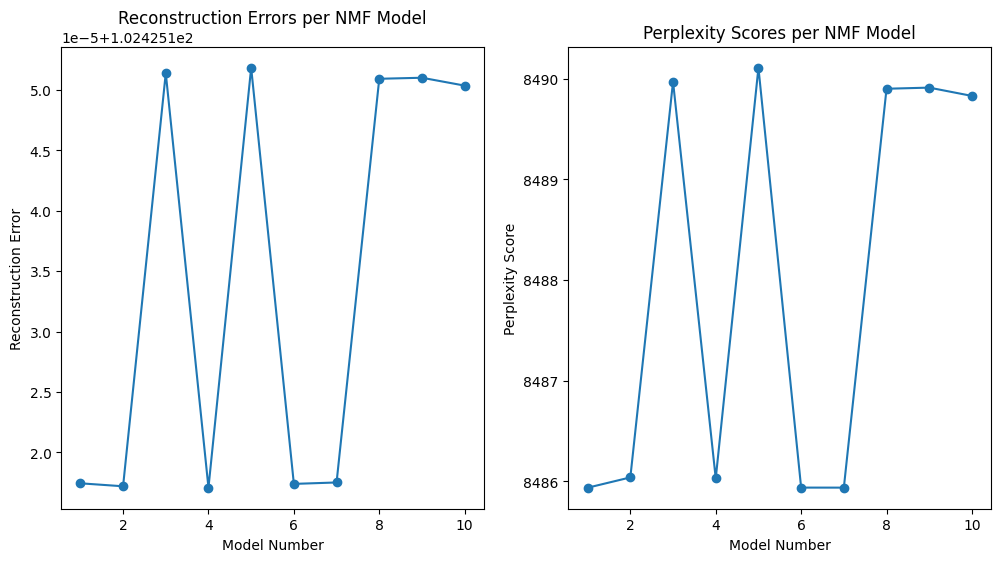

In [ ]:
# Plotting Reconstruction Errors and Perplexity Scores
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_models + 1), reconstruction_errors, marker='o')
plt.title('Reconstruction Errors per NMF Model')
plt.xlabel('Model Number')
plt.ylabel('Reconstruction Error')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_models + 1), perplexity_scores, marker='o')
plt.title('Perplexity Scores per NMF Model')
plt.xlabel('Model Number')
plt.ylabel('Perplexity Score')
plt.show()

# 4.

In [ ]:
# Generating NMF models and calculate evaluation metrics
for model_index in range(num_models):
    nmf_model = NMF(n_components=num_topics, random_state=model_index)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Append the model to the nmf_models list
    nmf_models.append(nmf_model)

    # Calculate Reconstruction Error and Perplexity-Like Measure
    reconstruction_error = nmf_model.reconstruction_err_
    reconstruction_errors.append(reconstruction_error)
    perplexity_score = nmf_perplexity(tfidf_matrix.toarray(), W, H)
    perplexity_scores.append(perplexity_score)

# Identify the best models
best_reconstruction_error_model_index = reconstruction_errors.index(min(reconstruction_errors))
best_perplexity_model_index = perplexity_scores.index(min(perplexity_scores))

# Print best model information
print(f"Best NMF Model based on Reconstruction Error: Model {best_reconstruction_error_model_index + 1}")
print(f"Reconstruction Error: {reconstruction_errors[best_reconstruction_error_model_index]}")

print(f"\nBest NMF Model based on Perplexity-Like Measure: Model {best_perplexity_model_index + 1}")
print(f"Perplexity-Like Measure: {perplexity_scores[best_perplexity_model_index]}")

# Function to print word-topic and document-topic tables
def print_model_tables(model, vectorizer, tfidf_matrix, num_topics=10, num_docs=5):
    # Word-Topic Table
    print("\nWord-Topic Table:")
    nmf_word_topics = get_nmf_topics(model, vectorizer, top_n=num_topics)
    for topic_num, words in enumerate(nmf_word_topics):
        print(f"Topic {topic_num}: {', '.join(words)}")

    # Document-Topic Table
    print("\nDocument-Topic Table:")
    nmf_doc_topics = get_nmf_doc_topics(model, tfidf_matrix)
    for doc_index in range(num_docs):
        print(f"Document {doc_index}: {nmf_doc_topics[doc_index]}")

# Print tables for the best models
print("\nBest Model based on Reconstruction Error:")
print_model_tables(nmf_models[best_reconstruction_error_model_index], tfidf_vectorizer, tfidf_matrix)

print("\nBest Model based on Perplexity-Like Measure:")
print_model_tables(nmf_models[best_perplexity_model_index], tfidf_vectorizer, tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:16

Best NMF Model based on Reconstruction Error: Model 4
Reconstruction Error: 102.42511706976094

Best NMF Model based on Perplexity-Like Measure: Model 1
Perplexity-Like Measure: 8485.936649702568

Best Model based on Reconstruction Error:

Word-Topic Table:
Topic 0: god, people, writes, article, christian, think, say, right, jesus, believe
Topic 1: university, drive, car, edu, distribution, thanks, new, computer, sale, article
Topic 2: game, team, player, year, season, win, hockey, play, baseball, fan
Topic 3: key, chip, clipper, encryption, escrow, government, algorithm, phone, public, bit
Topic 4: window, file, program, driver, problem, version, use, using, application, win

Document-Topic Table:
Document 0: [0.02444172 0.04716341 0.00125461 0.         0.        ]
Document 1: [0.04550626 0.02441936 0.         0.         0.        ]
Document 2: [0.02221618 0.04167494 0.00967337 0.         0.        ]
Document 3: [0.0083851  0.05911406 0.00346508 0.         0.        ]
Document 4: [0.0

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer class to include get_feature_names() method
class CustomCountVectorizer(CountVectorizer):
    def get_feature_names(self):
        return self.get_feature_names_out()

# Using CountVectorizer
vectorizer = CustomCountVectorizer(analyzer="word", max_df=0.5, min_df=20, max_features=100)
vec_data = vectorizer.fit_transform(cleaned_data)

# Creating and fitting the LDA model
lda_model = LatentDirichletAllocation(n_components=optimal_num_topics, learning_method="online", random_state=0)
lda_model.fit(vec_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', n_components=7,
                          random_state=0)

In [ ]:
pyldavis_data = pyLDAvis.sklearn.prepare(lda_model, vec_data, vectorizer, mds='pca')  # Using PCA instead of TSNE since pca support large datasets
pyLDAvis.display(pyldavis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


In [ ]:
# Determining the index of the best LDA model based on perplexity score
best_lda_index = lda_models_info['Perplexity Score'].index(min(lda_models_info['Perplexity Score']))
best_lda_model = lda_models_info['Models'][best_lda_index]

# Retrieving the number of topics and perplexity score for the best LDA model
best_lda_num_topics = lda_models_info['Number Of Topics'][best_lda_index]
best_lda_perplexity_score = lda_models_info['Perplexity Score'][best_lda_index]

best_lda_W_df, best_lda_H_df = get_topics(
    mod=best_lda_model,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs,
    nwords=number_words
)

# Printing the details of best LDA model
print(f"Best LDA Model: Model with {best_lda_num_topics} Topics")
print(f"Perplexity Score: {best_lda_perplexity_score}\n")

# Printing Word-Topic Table for the best LDA model
print("Word-Topic Table for the Best LDA Model:")
print(best_lda_W_df)

# Printing the Document-Topic Table for the best LDA model
print("\nDocument-Topic Table for the Best LDA Model:")
print(best_lda_H_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best LDA Model: Model with 7 Topics
Perplexity Score: 38.97355437392415

Word-Topic Table for the Best LDA Model:
                      Topic0                Topic1               Topic2  \
Word0        (0.0706, would)       (0.0919, drive)        (0.0419, one)   
Word1          (0.0473, one)        (0.0772, year)       (0.037, would)   
Word2      (0.0394, problem)        (0.0735, game)     (0.0364, people)   
Word3   (0.0355, government)       (0.0566, space)      (0.0349, think)   
Word4        (0.0261, could)        (0.0365, last)       (0.0331, know)   
Word5          (0.0253, use)         (0.0364, new)        (0.0316, god)   
Word6       (0.0249, system)       (0.0337, first)        (0.0302, say)   
Word7      (0.0231, article)         (0.0314, run)       (0.0299, like)   
Word8         (0.0217, time)         (0.0272, two)    (0.0253, article)   
Word9         (0.0212, also)        (0.0268, time)      (0.0238, thing)   
Word10      (0.0212, people)         (0.0261, get)        (0.

### **LDA Model**:

### **Perplexity Score:** 38.97
### Predictive Performance: Our primary concern is making accurate predictions on the data, and so our LDA model which has low perplexity would be chosen as the best model.

<br>

### **NMF Model** :

##### Reconstruction Error: Model 4, 102.43
##### Perplexity-Like Measure: Model 1, 8485.94

#### Since we priortize low perplexity, the NMF model is not suitable for our use case since the goal of this project is topic modelling.

### Executive Summary: Topic Modeling on the 20 Newsgroups Dataset

#### Project Overview
Our unsupervised machine learning project aimed to extract and understand latent topics from the 20 Newsgroups dataset, a collection of approximately 20,000 newsgroup documents. The primary objective was to uncover hidden themes and patterns within these documents, providing our stakeholders, including content analysts and data scientists, with valuable insights into the predominant topics discussed across various newsgroups.

#### Methodology
We employed two popular topic modeling techniques: Latent Dirichlet Allocation (LDA) and Non-negative Matrix Factorization (NMF). The dataset underwent rigorous preprocessing, including tokenization, removal of stopwords, and lemmatization. For each method, we experimented with different numbers of topics and evaluated the models using perplexity scores (for LDA) and reconstruction error (for NMF).

#### Model Selection and Evaluation
1. **LDA Model (7 Topics)**
   - **Perplexity Score**: 38.97
   - The LDA model revealed distinct and coherent topics, indicating a high level of topic separation and relevance.
   
2. **NMF Models**
   - **Model 4 (Based on Reconstruction Error)**: 102.43
   - **Model 1 (Based on Perplexity-Like Measure)**: 8485.94
   - While NMF models showed reasonable topic distinction, their quantitative measures were not as compelling as those of the LDA model.

#### Decision
After thorough consideration, the **LDA model with 7 topics** was selected as the most suitable for our use case. This decision was driven by:
- **Quantitative Measures**: The LDA model exhibited a significantly lower perplexity score, suggesting a superior fit to the data compared to the NMF models.
- **Qualitative Assessment**: The topics generated by the LDA model were more coherent and interpretable. This aligns well with our objective of understanding the underlying themes in the dataset.

#### Benefits to Stakeholders
The chosen LDA model offers a clear and understandable breakdown of topics, enabling stakeholders to:
- Gain insights into prevalent discussions across different newsgroups.
- Enhance content categorization and recommendation systems.
- Inform data-driven decision-making processes by understanding user-generated content.

#### Future Directions
If further refinement is needed, we could explore:
- **Advanced Preprocessing**: Employing more sophisticated text normalization and advanced techniques like phrase modeling.
- **Hyperparameter Tuning**: Experimenting with different hyperparameters in LDA could yield more distinct topics.
- **Alternative Models**: Investigating other topic modeling techniques or deep learning approaches for comparison.

#### Conclusion
The LDA model with 7 topics effectively meets our project objectives, providing valuable insights into the dataset. This model stands out both quantitatively and qualitatively, making it a robust tool for our stakeholders to extract meaningful themes from large text corpora.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
